In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import Logit
import patsy

from scipy import stats

import pymc3 as pm

In [2]:
import model_functions as mf

MF reloaded


In [3]:
with pd.HDFStore("out/Model.v3.h5") as store:
    X = store["X"]
    print "Finished X"
    y = store["y"]
    print "Finished y"

Finished X
Finished y


In [ ]:
with pd.HDFStore("out/Model.v3.h5", mode="w") as store:
    store.put("X", X, format="table")
    print "Finished X"
    store.put("y", y, format="table")
    print "Finished y"

## Load data from HDF5

In [3]:
with pd.HDFStore('out/ModelData.20160529.h5') as cstore:
    df = cstore['first_author']

In [4]:
GENDERS = ["-", "F", "M"]
TOP_15_ETHNICITIES = ["ENGLISH", "GERMAN", "HISPANIC", "CHINESE",
                      "JAPANESE", "SLAV", "FRENCH", "ITALIAN", "INDIAN",
                      "NORDIC", "ARAB", "DUTCH", "KOREAN", "UNKNOWN", "OTHER"]
TOP_15_COUNTRIES = ["USA", "UNKNOWN", "UK", "JAPAN", "GERMANY", "FRANCE", "ITALY",
                    "CANADA", "CHINA", "AUSTRALIA", "SPAIN", "NETHERLANDS",
                    "SWEDEN", "INDIA", "OTHER"]

sns.set_context("poster")
sns.set_style("ticks")

In [5]:
def logit(p):
    return np.log10(p/(1-p))

def get_empirical_logit(df, X_col, y_col, conditioning_var="Gender",
    bins=None, testing=False):
    if testing:
        # If testing the just print X and y columns
        print X_col, y_col
        return None
    ## Not testing. Generate the proportions per category
    print X_col, conditioning_var, y_col
    t = df.pivot_table(index=pd.cut(df[X_col], bins=bins),
      columns=conditioning_var, values=y_col,
      aggfunc=[np.mean, len])
    t = t.set_index(bins[1:])
    return t


auth_prev_papers
auth_prev_papers gender is_self_cite
sink_prev_ncites
sink_prev_ncites gender is_self_cite
source_n_mesh_ex
source_n_mesh_ex gender is_self_cite
sink_n_mesh_ex
sink_n_mesh_ex gender is_self_cite
jj_sim
jj_sim gender is_self_cite
year_span
year_span gender is_self_cite
source_ncites
source_ncites gender is_self_cite
source_n_authors
source_n_authors gender is_self_cite


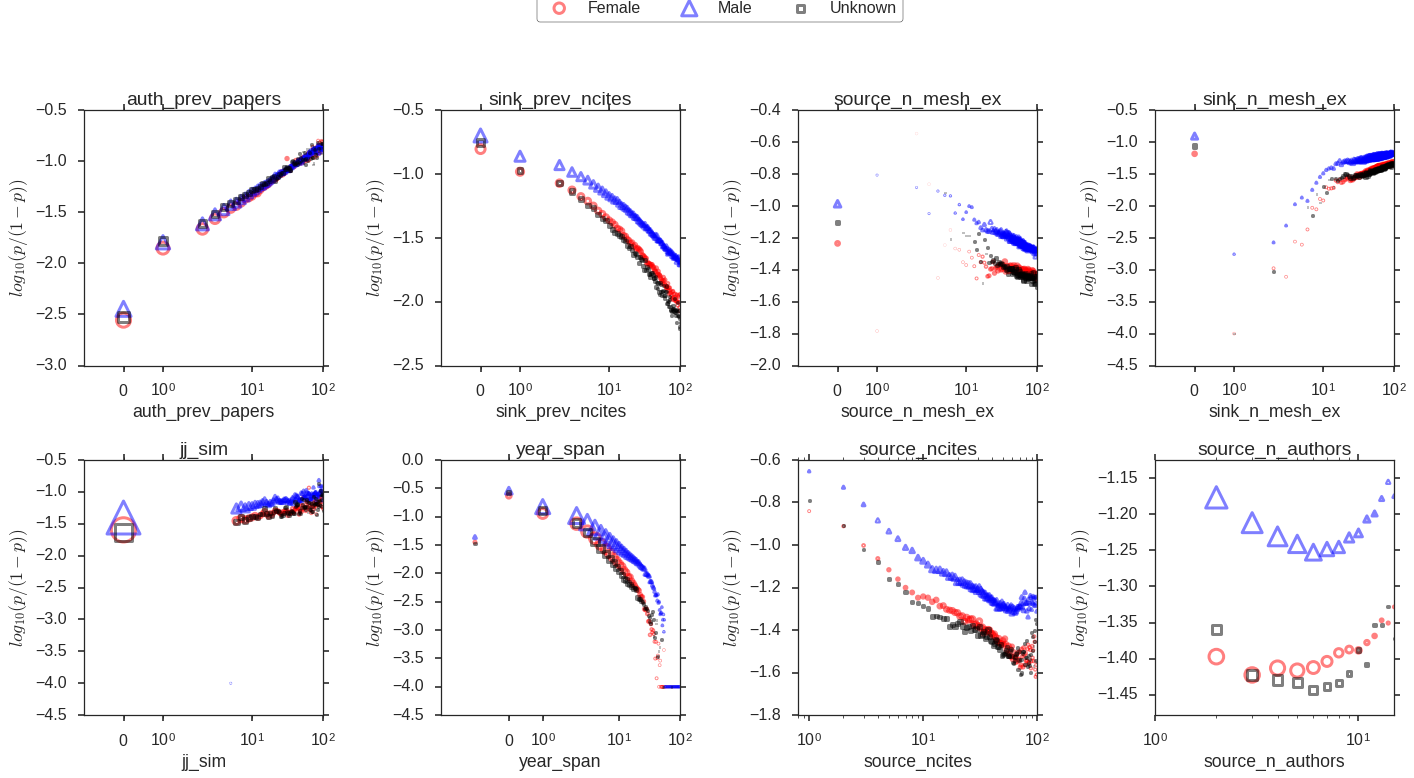

In [68]:
colors = ["r", "b", "k"]
markers = ["o", "^", "s"]
conditioning_names = ["F", "M", "-"]
cm = plt.cm.get_cmap('Greys')
plt.clf()
plt.close("all")
fig, ax = plt.subplots(2,4, figsize=(20,10))
ax = ax.flatten()
plot_id = 0
y_feature_col = "is_self_cite"
xcols = ["auth_prev_papers", "sink_prev_ncites", 
         "source_n_mesh_ex", "sink_n_mesh_ex", "jj_sim",
         "year_span", "source_ncites", "source_n_authors"]
for k in xcols:
    if k in ["auth_prev_papers", "sink_prev_ncites", "jj_sim"]:
        bins = np.array(range(-1,1000))
        xscale = "symlog"
        xlims = [-1, 100]
    if k in ["source_n_mesh_ex", "sink_n_mesh_ex",]:
        bins = np.array(range(-1,100))
        xscale = "symlog"
        xlims = [-1, 100]
    if k in ["source_ncites"]:
        bins = np.array(range(-1,100))
        xscale = "log"
        xlims = [0.8, 100]
    if k in ["source_n_authors"]:
        bins = np.array(range(-1,100))
        xscale = "log"
        xlims = [1, 15]
    if k in ["year_span"]:
        bins = np.array([-10, -1] + range(100))
        xscale = "symlog"
        xlims = [-2, 100]
    print k
    t = get_empirical_logit(
        df, k, y_feature_col,
        conditioning_var="gender",
        bins=bins,
        testing=False)
    t = t[(t.index >= xlims[0]) & (t.index <= xlims[1])]
    t_logit = logit(t["mean"]).clip(-4,2)
    lgd_items = []
    for j,c in enumerate(conditioning_names):
        scp = ax[plot_id].scatter(t_logit.index, t_logit[c], edgecolor=colors[j], s=t["len"][c] / 1e4, 
                                  facecolor='none', alpha=0.5, linewidth=3, marker=markers[j], label=c)
        """
        
        line, = ax[plot_id].plot(t_logit[t_logit[c].notnull()].index, t_logit[t_logit[c].notnull()][c],
                                 marker="None", linestyle="-", color=colors[j], label=c, lw=1, alpha=0.7)
        lgd_items.append(line)
        """
        lgd_items.append(scp)
    ax[plot_id].set_xlabel(k)
    ax[plot_id].set_ylabel("$log_{10}(p/(1-p))$")
    ax[plot_id].set_title(k)
    ax[plot_id].set_xscale(xscale)
    ax[plot_id].set_xlim(xlims)
    #ax[plot_id].set_ylim((-4,2))
    plot_id += 1
plt.margins(0.1)
#ax.legend(handles=lgd_items, loc="upper center", ncol=3)
lgd = fig.legend(lgd_items, ["Female", "Male", "Unknown"],
                 loc = 'upper center',
                 bbox_to_anchor=(0.5,1.1), ncol=3,
                 frameon=True, fancybox=True, prop={"size": 16})
fig.tight_layout()
plt.savefig("Empirical_1.pdf")

source_T_novelty
source_T_novelty gender is_self_cite
source_V_novelty
source_V_novelty gender is_self_cite
source_PT_novelty
source_PT_novelty gender is_self_cite
source_PV_novelty
source_PV_novelty gender is_self_cite
sink_T_novelty
sink_T_novelty gender is_self_cite
sink_V_novelty
sink_V_novelty gender is_self_cite
sink_PT_novelty
sink_PT_novelty gender is_self_cite
sink_PV_novelty
sink_PV_novelty gender is_self_cite


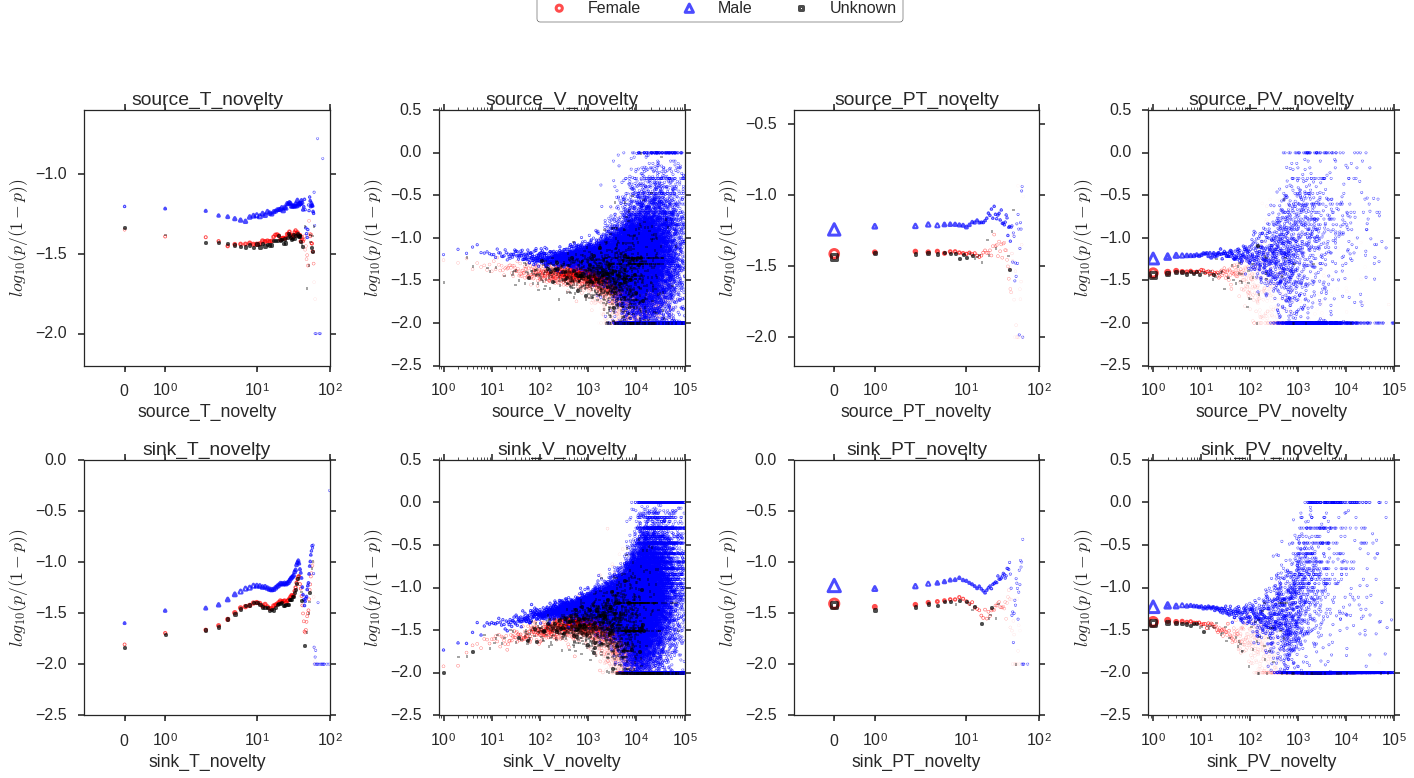

In [70]:
colors = ["r", "b", "k"]
markers = ["o", "^", "s"]
conditioning_names = ["F", "M", "-"]
cm = plt.cm.get_cmap('Greys')
plt.clf()
plt.close("all")
fig, ax = plt.subplots(2,4, figsize=(20,10))
ax = ax.flatten()
plot_id = 0
y_feature_col = "is_self_cite"
xcols = ["source_T_novelty", "source_V_novelty", 
         "source_PT_novelty", "source_PV_novelty",
         "sink_T_novelty", "sink_V_novelty", 
         "sink_PT_novelty", "sink_PV_novelty",]
for k in xcols:
    if k in ["source_T_novelty", "source_PT_novelty", "sink_T_novelty", "sink_PT_novelty"]:
        bins = np.array([-1] + range(0,100))
        xscale = "symlog"
        xlims = [-1, 100]
    if k in ["source_V_novelty", "source_PV_novelty", "sink_V_novelty", "sink_PV_novelty"]:
        bins = np.array(range(0,100000))
        xscale = "log"
        xlims = [0.8, 1e5]
    print k
    t = get_empirical_logit(df, k, y_feature_col,
    conditioning_var="gender",
    bins=bins,
    testing=False)
    t = t[(t.index >= xlims[0]) & (t.index <= xlims[1])]
    t_logit = logit(t["mean"]).clip(-2,0)
    lgd_items = []
    for j,c in enumerate(conditioning_names):
        scp = ax[plot_id].scatter(t_logit.index, t_logit[c], edgecolor=colors[j], s=t["len"][c] / 1e5, 
                                  facecolor='none', alpha=0.7, linewidth=3, marker=markers[j])
        """
        line, = ax[plot_id].plot(t_logit[t_logit[c].notnull()].index, t_logit[t_logit[c].notnull()][c],
                                 marker="None", linestyle="-", color=colors[j], label=c, lw=1, alpha=0.7)
        lgd_items.append(line)
        """
        lgd_items.append(scp)
    """
    xlims = [t_logit[t_logit[c].notnull()].index.min(),
             t_logit[t_logit[c].notnull()].index.max()]
    """
    ax[plot_id].set_xlabel(k)
    ax[plot_id].set_ylabel("$log_{10}(p/(1-p))$")
    ax[plot_id].set_title(k)
    ax[plot_id].set_xscale(xscale)
    ax[plot_id].set_xlim(xlims)
    #ax[plot_id].set_ylim((-6,0.5))
    plot_id += 1

#ax.legend(handles=lgd_items, loc="upper center", ncol=3)
lgd = fig.legend(lgd_items, ["Female", "Male", "Unknown"],
                 loc = 'upper center',
                 bbox_to_anchor=(0.5,1.1), ncol=3,
                 frameon=True, fancybox=True, prop={"size": 16})
fig.tight_layout()
plt.savefig("Empirical_2.pdf")

## Try models

In [72]:
formula = ("is_self_cite ~ I(auth_prev_papers == 0) + np.log10(auth_prev_papers + 1)"
           "+ C(gender, levels=GENDERS) + C(source_country, levels=TOP_15_COUNTRIES)"
           "+ mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)"
           "+ I(source_ncites == 1) + np.log10(source_ncites) + I(np.log10(source_ncites)**2)"
           "+ I(source_n_authors > 20) + np.log10(np.clip(source_n_authors, 0, 20))"
           "+ I(np.log10(np.clip(source_n_authors, 0, 20))**2)"
           "+ np.log10(source_n_mesh_ex + 1) + I(source_n_mesh_ex == 0)" 
           "+ np.log10(sink_n_mesh_ex + 1) + I(sink_n_mesh_ex == 0)"
           "+ I(year_span < 0) + I(year_span == 0) + mf.score_log_1(year_span) + I(mf.score_log_1(year_span)**2)"
           "+ I(sink_prev_ncites == 0) + np.log10(sink_prev_ncites + 1) + I(np.log10(sink_prev_ncites + 1)**2)"
           "+ I(jj_sim == 0) + np.log10(jj_sim + 1) + I(np.log10(jj_sim + 1)**2) + journal_same"
           "+ source_is_eng + source_is_journal + source_is_review + source_is_case_rep + source_is_let_ed_com"
           "+ sink_is_eng + sink_is_journal + sink_is_review + sink_is_case_rep + sink_is_let_ed_com"
           "+ np.log10(np.nan_to_num(source_V_novelty) + 1)"
           "+ np.log10(np.nan_to_num(sink_V_novelty) + 1) + I(np.log10(np.nan_to_num(sink_V_novelty) + 1)**2)"
          )
y,X = patsy.dmatrices(formula, data=df, return_type="dataframe")

Using class based MultiVal
using complimentary weights for 2 columns. w and 1-w
Using class based MultiVal
using complimentary weights for 2 columns. w and 1-w


In [73]:
X.columns, y.columns

(Index([u'Intercept', u'I(auth_prev_papers == 0)[T.True]',
        u'C(gender, levels=GENDERS)[T.F]', u'C(gender, levels=GENDERS)[T.M]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.UNKNOWN]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.UK]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.JAPAN]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.GERMANY]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.FRANCE]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.ITALY]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.CANADA]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.CHINA]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.AUSTRALIA]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.SPAIN]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.NETHERLANDS]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.SWEDEN]',
        u'C(source_country, levels=TOP_15_COUNTRIES)[T.INDIA]',
        u'C(sourc

In [74]:
model = Logit(y,X)
res = model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.153249
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                    Results: Logit
======================================================================================================================
Model:                                Logit                            Pseudo R-squared:                 0.211        
Dependent Variable:                   is_self_cite                     AIC:                              12756115.5917
Date:                                 2016-05-31 17:30                 BIC:                              12757157.0432
No. Observations:                     41618369                         Log-Likelihood:                   -6.3780e+06  
Df Model:                             66                               LL-Null:                          -8.0787e+06  
Df Residuals:                         41618302                         LLR p-value:                      0.0000       
Converged:                            1.0000                           Scale:                            1.0000       
No. Iterations:                       10.0000                                                                         
----------------------------------------------------------------------------------------------------------------------
                                                                      Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                                            -2.5006   0.0278  -89.9202 0.0000 -2.5551 -2.4461
I(auth_prev_papers == 0)[T.True]                                     -1.5114   0.0080 -189.0480 0.0000 -1.5271 -1.4958
C(gender, levels=GENDERS)[T.F]                                       -0.0208   0.0033   -6.2308 0.0000 -0.0273 -0.0142
C(gender, levels=GENDERS)[T.M]                                       -0.0367   0.0031  -11.9396 0.0000 -0.0427 -0.0307
C(source_country, levels=TOP_15_COUNTRIES)[T.UNKNOWN]                -0.0533   0.0064   -8.2918 0.0000 -0.0658 -0.0407
C(source_country, levels=TOP_15_COUNTRIES)[T.UK]                     -0.0066   0.0032   -2.0288 0.0425 -0.0129 -0.0002
C(source_country, levels=TOP_15_COUNTRIES)[T.JAPAN]                   0.2510   0.0063   39.8045 0.0000  0.2387  0.2634
C(source_country, levels=TOP_15_COUNTRIES)[T.GERMANY]                 0.0211   0.0042    5.0863 0.0000  0.0130  0.0293
C(source_country, levels=TOP_15_COUNTRIES)[T.FRANCE]                 -0.0478   0.0053   -9.1071 0.0000 -0.0581 -0.0375
C(source_country, levels=TOP_15_COUNTRIES)[T.ITALY]                  -0.1036   0.0065  -15.8645 0.0000 -0.1164 -0.0908
C(source_country, levels=TOP_15_COUNTRIES)[T.CANADA]                 -0.0072   0.0042   -1.6913 0.0908 -0.0155  0.0011
C(source_country, levels=TOP_15_COUNTRIES)[T.CHINA]                  -0.4342   0.0099  -43.7575 0.0000 -0.4536 -0.4148
C(source_country, levels=TOP_15_COUNTRIES)[T.AUSTRALIA]               0.0881   0.0052   16.8647 0.0000  0.0778  0.0983
C(source_country, levels=TOP_15_COUNTRIES)[T.SPAIN]                  -0.1234   0.0063  -19.5337 0.0000 -0.1358 -0.1110
C(source_country, levels=TOP_15_COUNTRIES)[T.NETHERLANDS]             0.0617   0.0071    8.6683 0.0000  0.0477  0.0756
C(source_country, levels=TOP_15_COUNTRIES)[T.SWEDEN]                  0.0952   0.0067   14.2377 0.0000  0.0821  0.1083
C(source_country, levels=TOP_15_COUNTRIES)[T.INDIA]                  -0.0535   0.0104   -5.1201 0.0000 -0.0740 -0.0330
C(source_country, levels=TOP_15_COUNTRIES)[T.OTHER]                  -0.0687   0.0027  -25.6879 0.0000 -0.0740 -0.0635
I(source_ncites == 1)[T.True]                                         0.3013   0.0179   16.8312 0.0000  0.2662  0.3363
I(source_n_authors > 20)[T.True]                                     -0.0128   0.0146   -0.8798 0.3790 -0.0413  0.0157
I(source_n_mesh_ex == 0)[T.True]                                     -0.6410

In [100]:
with pd.HDFStore("out/Model.v3.h5", mode="w",) as store:
    store["X"] = X
    print "Finished X"
    store["y"] = y
    print "Finished y"

EMS reloaded
Finished X
Finished y


In [75]:
y_pred = res.predict()

In [77]:
y_pred[:10]

array([ 0.32963518,  0.25792937,  0.03265883,  0.03094586,  0.03080083,
        0.06432226,  0.02241476,  0.10864539,  0.02931361,  0.13297744])

## Test model feature categories

In [101]:
feature_dict = { 
	"Intercept": [u'Intercept',],
	"Gender": [
		u'C(gender, levels=GENDERS)[T.F]',
		u'C(gender, levels=GENDERS)[T.M]',
		],
	"Affiliation": [
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.UNKNOWN]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.UK]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.JAPAN]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.GERMANY]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.FRANCE]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.ITALY]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.CANADA]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.CHINA]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.AUSTRALIA]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.SPAIN]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.NETHERLANDS]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.SWEDEN]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.INDIA]',
		u'C(source_country, levels=TOP_15_COUNTRIES)[T.OTHER]',
	],
	"Ethnicity": [
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[0]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[1]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[2]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[3]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[4]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[5]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[6]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[7]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[8]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[9]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[10]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[11]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[12]',
		u'mf.MC(eth1, eth2, weights=eth_weight, levels=TOP_15_ETHNICITIES)[13]',
	],
	"AuthorAge": [
		u'I(auth_prev_papers == 0)[T.True]',
		u'np.log10(auth_prev_papers + 1)',
	],
	"SourceCites": [
		u'I(source_ncites == 1)[T.True]',
		u'np.log10(source_ncites)',
		u'I(np.log10(source_ncites) ** 2)',
	],
	"SourceAuthors": [
		u'I(source_n_authors > 20)[T.True]',
		u'np.log10(np.clip(source_n_authors, 0, 20))',
		u'I(np.log10(np.clip(source_n_authors, 0, 20)) ** 2)',
	],
	"MeshCounts": [
		u'I(source_n_mesh_ex == 0)[T.True]',
		u'I(sink_n_mesh_ex == 0)[T.True]',
		u'np.log10(source_n_mesh_ex + 1)',
		u'np.log10(sink_n_mesh_ex + 1)',
	],
	"Journal": [
		u'journal_same[T.True]',
		u'I(jj_sim == 0)[T.True]',
		u'np.log10(jj_sim + 1)',
		u'I(np.log10(jj_sim + 1) ** 2)',
	],
	"YearSpan": [
		u'I(year_span < 0)[T.True]',
		u'I(year_span == 0)[T.True]',
		u'mf.score_log_1(year_span)',
		u'I(mf.score_log_1(year_span) ** 2)',
	],
	"SinkCites": [
		u'I(sink_prev_ncites == 0)[T.True]',
		u'np.log10(sink_prev_ncites + 1)',
		u'I(np.log10(sink_prev_ncites + 1) ** 2)',
	],
	"PubType": [
		u'source_is_journal[T.True]',
		u'source_is_review[T.True]',
		u'source_is_case_rep[T.True]',
		u'source_is_let_ed_com[T.True]',
		u'sink_is_journal[T.True]',
		u'sink_is_review[T.True]',
		u'sink_is_case_rep[T.True]',
		u'sink_is_let_ed_com[T.True]',
	],
	"Language": [
		u'source_is_eng[T.True]',
		u'sink_is_eng[T.True]',
	],
	"VolumeNovelty": [
		u'np.log10(np.nan_to_num(source_V_novelty) + 1)',
		u'np.log10(np.nan_to_num(sink_V_novelty) + 1)',
		u'I(np.log10(np.nan_to_num(sink_V_novelty) + 1) ** 2)'
	]
}


EMS reloaded


In [102]:
len(sum(feature_dict.values(), []))

67

In [103]:
X.columns.shape

(67,)

In [106]:
for k, v in feature_dict.iteritems():
    print "Shape of factor matrix with %s factors in feature category %s: %s" % (k, len(v), X[v].shape)

Shape of factor matrix with SourceCites factors in feature category 3: (41618369, 3)
Shape of factor matrix with Gender factors in feature category 2: (41618369, 2)
Shape of factor matrix with AuthorAge factors in feature category 2: (41618369, 2)
Shape of factor matrix with SourceAuthors factors in feature category 3: (41618369, 3)
Shape of factor matrix with VolumeNovelty factors in feature category 3: (41618369, 3)
Shape of factor matrix with Language factors in feature category 2: (41618369, 2)
Shape of factor matrix with YearSpan factors in feature category 4: (41618369, 4)
Shape of factor matrix with Journal factors in feature category 4: (41618369, 4)
Shape of factor matrix with PubType factors in feature category 8: (41618369, 8)
Shape of factor matrix with Affiliation factors in feature category 14: (41618369, 14)
Shape of factor matrix with SinkCites factors in feature category 3: (41618369, 3)
Shape of factor matrix with Intercept factors in feature category 1: (41618369, 1)

In [107]:
len(feature_dict)

14

## Model evaluation

In [108]:
import eval_measures as ems

In [109]:
def plot_prc(prc, ax, color="k", label="PRC"):
    precision, recall = prc
    ax.plot(recall, precision,marker="None", linestyle="-", color=color, label=label)

def get_all_eval_measures(res, endog, include_prc=False):
    predict = res.predict()
    measures = {}
    pred_table = ems.cm(predict, endog)
    measures["precision"] = ems.precision(pred_table)
    measures["recall"] = ems.recall(pred_table)
    measures["accuracy"] = ems.accuracy(pred_table)
    measures["f_score"] = ems.fscore_measure(pred_table)
    measures["rmse"] = ems.rmse(predict, endog)
    measures["mae"] = ems.mae(predict, endog)
    measures["auc"] = ems.auc(predict, endog)
    measures["llf"] = res.llf
    measures["aic"] = res.aic
    measures["bic"] = res.bic
    measures["prsquared"] = res.prsquared
    measures["df_model"] = res.df_model
    tn, fp, fn, tp = map(float, pred_table.flatten()) # WRT to 1 as positive label
    measures["tn"] = tn
    measures["fn"] = fn
    measures["fp"] = fp
    measures["tp"] = tp
    print "In eval measures function."
    if include_prc:
        ## Include the precision recall values
        prc = ems.prc(predict, endog, float_precision=3)
        measures["prc"] = prc
    return measures


In [110]:
measures = get_all_eval_measures(res, model.endog, include_prc=False)

In eval measures function.


In [112]:
measures

{'accuracy': 0.9507482621435741,
 'aic': 12756115.591727437,
 'auc': 0.85428998282162383,
 'bic': 12757157.043224186,
 'df_model': 66.0,
 'f_score': 0.048553202570207,
 'fn': 1966737.0,
 'fp': 83040.0,
 'llf': -6377990.7958637187,
 'mae': 0.082279332242182854,
 'precision': 0.38643869928550845,
 'prsquared': 0.21051765454898874,
 'recall': 0.02590392057999899,
 'rmse': 0.20438018624692311,
 'tn': 39516291.0,
 'tp': 52301.0}

In [49]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
%aimport model_functions

In [90]:
%autoreload 2

EMS reloaded
